Printing hello world

In [15]:
print("Hello world!\n")

Hello world!


Adding two numbers

In [16]:
# julia cannot take inputs from jupyter, assign variables "normally"

x = 1
y = 3

println("Enter x: \n")
# x = readlines()
println("Enter y: \n")
# y = readlines()
x + y

Enter x: 

Enter y: 



4

Count ten non-negative even integers

In [17]:
for i in 1:10
    println(i)
end

1
2
3
4
5
6
7
8
9
10


Compare 2 values to see which is better

In [18]:
# ditto
x = 5
y = 6

if x > y
    return "x is larger"
elseif x == y
    return "both are equal"
else
    return "y is larger"
end

"y is larger"

*ADDITIONAL ACTIVITIES*

In [19]:
# 2
x::Float64 = 1./2 # As it turns out, Julia is a little smarter than C when it comes to clarity
print(x)
x = 1/2
print(x)

ErrorException: syntax: invalid syntax "1./"; add space(s) to clarify

In [28]:
# 3
# regarding scanning in, ditto
# i tells whether or not to give the positive (1) or negative (2) result

function quadratic(a, b, c, i::Int64)
    discrim::Int64 = (b^2) - 4 * a * c

    if discrim > 0
        ans = zeros(Float64, 2)
        # quadratic equation gives 2 solutions
        ans[1] = -b + sqrt((b^2) - (4 * a * c)) / (2 * a)
        ans[2] = -b - sqrt((b^2) - (4 * a * c)) / (2 * a)
        
        ans[i]
    elseif discrim == 0
        ans = -b / (2 * a)
    else
        ans = zeros(ComplexF64, 2)
        # quadratic equation gives 2 solutions
        ans[1] = -b + sqrt(Complex((b^2) - (4 * a * c))) / (2 * a)
        ans[2] = -b - sqrt(Complex((b^2) - (4 * a * c))) / (2 * a)

        ans[i]
    end
end

ErrorException: expression is not a function call, or is too complex for @code_llvm to analyze; break it down to simpler parts if possible. In some cases, you may want to use Meta.@lower.

In [29]:
println(quadratic(5,2,1,2))
println(quadratic(5,2,1,1))

println(quadratic(5,10,1,2))
println(quadratic(5,10,1,1))

-2.0 - 0.4im
-2.0 + 0.4im
;  @ coreio.jl:4 within `println`
define void @julia_println_4234(double %0) #0 {
top:
  %1 

= alloca [2 x {}*], align 8
  %gcframe4 = alloca [4 x {}*], align 16
  %gcframe4.sub = getelementptr inbounds [4 x {}*], [4 x {}*]* %gcframe4, i64 0, i64 0
  %.sub = getelementptr inbounds [2 x {}*], [2 x {}*]* %1, i64 0, i64 0
  %2 = bitcast [4 x {}*]* %gcframe4 to i8*
  call void @llvm.memset.p0i8.i32(i8* noundef nonnull align 16 dereferenceable(32) %2, i8 0, i32 32, i1 false)
  %3 = call {}*** inttoptr (i64 6839906556 to {}*** (i64)*)(i64 260) #4
  %4 = bitcast [4 x {}*]* %gcframe4 to i64*
  store i64 8, i64* %4, align 16
  %5 = load {}**, {}*** %3, align 8
  %6 = getelementptr inbounds [4 x {}*], [4 x {}*]* %gcframe4, i64 0, i64 1
  %7 = bitcast {}** %6 to {}***
  store {}** %5, {}*** %7, align 8
  %8 = bitcast {}*** %3 to {}***
  store {}** %gcframe4.sub, {}*** %8, align 8
  %9 = load atomic {}*, {}** inttoptr (i64 5448901256 to {}**) unordered, align 8
  %10 = getelementptr inbounds [4 x {}*], [4 x {}*]* %gcframe4, i64 0, i64 3
  store {}* %9, {}** %10, align 8
  %ptls_field5 = g

In [22]:
# bonus round: latexify
using Latexify
latexify(quadratic(5,2,1,1))

L"$-2.0+0.4\mathit{i}$"

In [23]:
# bonus round 2: tell if the discriminant is positive or negative with the power of multiple dispatch

function telldiscrim(discrim::ComplexF64)
    println("negative")
end

function telldiscrim(discrim::Float64)
    println("positive or greater than 0")
end

telldiscrim (generic function with 2 methods)

In [24]:
telldiscrim(quadratic(1,5,1,2))
telldiscrim(quadratic(5,2,3,2))

positive or greater than 0
negative


  0.008458 seconds (32.76 k allocations: 1.674 MiB, 99.73% compilation time)


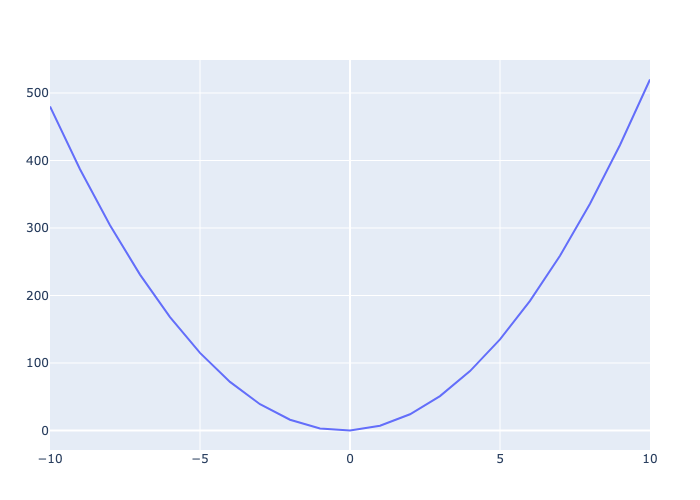

In [1]:
# bonus round 3: plotting

function polynomial(val1,
                    val2, 
                    val3, 
                    start, 
                    stop, 
                    step)

    yvals = zeros(Float64, 0) # make an empty array (0 elements) with a type Float64

#   For a scaled up version, I'd use a 32 bit float because Julia can be ran directly on the GPU.
#   This means that it inherits any hardware GPU limitations, namely that consumer-grade GPU's
#   cannot do double precision (Float64) computations. CUDA, the defacto option, inherits this too.

    for x in start:stop # iterators are very nice
        push!(yvals, val1*x^2 + val2*x + val3) # push y values into the array
    end

    yvals # return is optional
end

#############################################################
#                                                           #
#               INITIALIZING GRAPHING VARIABLES             #
#                                                           #
#############################################################

# graph features
start = -10
stop = 10
step = .00001

# polynomial values
a = 5
b = 2
c = 0

# Use @show to print out entire objects without needing stupid loops

x = start:stop # use the "range" type to specify x-axis
@time y = polynomial(a, b, c, start, stop, step) # generate the polynomial


using PlotlyJS
# gr() # use the gr backend
plot(x,y) # finally plot